In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
from pylattica.core import BasicController, Runner, SimulationState
from pylattica.square_grid import MooreNbHoodBuilder, VonNeumannNbHood2DBuilder
from pylattica.discrete.state_constants import DISCRETE_OCCUPANCY
from pylattica.models.game_of_life import Maze, Anneal, Diamoeba, Seeds, Life, GameOfLifeController

# Life-like Cellular Automata

There are many variations on Conway's Game of Life which [Life-like Automata](https://conwaylife.com/wiki/Life-like_cellular_automaton). There are implementations of these in pylattica for your enjoyment.

In [38]:
from pylattica.discrete import PhaseSet
from pylattica.square_grid.grid_setup import DiscreteGridSetup
from pylattica.visualization import DiscreteSquareGridArtist2D, DiscreteSquareGridResultArtist

phases = PhaseSet(["dead", "alive"])
setup = DiscreteGridSetup(phases)
artist = DiscreteSquareGridArtist2D()

#### Life

100%|███████████████████████████████████████████████| 60/60 [00:03<00:00, 19.62it/s]


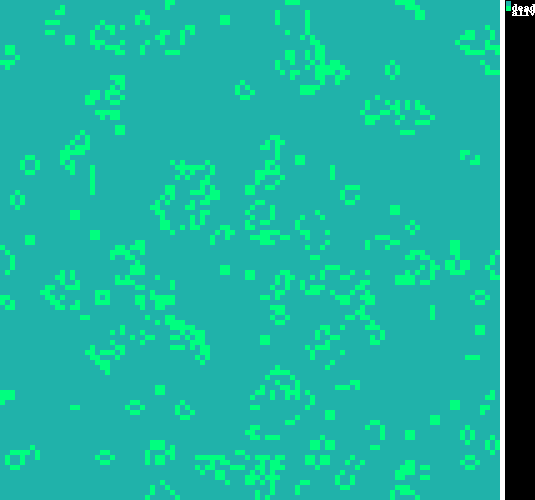

In [44]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
controller = Life()
runner = Runner(parallel=True)
result = runner.run(starting_state.state, controller, 60, structure=starting_state.structure, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)

In [48]:
DiscreteSquareGridResultArtist(artist, result).to_gif("out.gif", wait=0.2, cell_size=6)

#### Seeds

100%|███████████████████████████████████████████████| 60/60 [00:03<00:00, 19.97it/s]


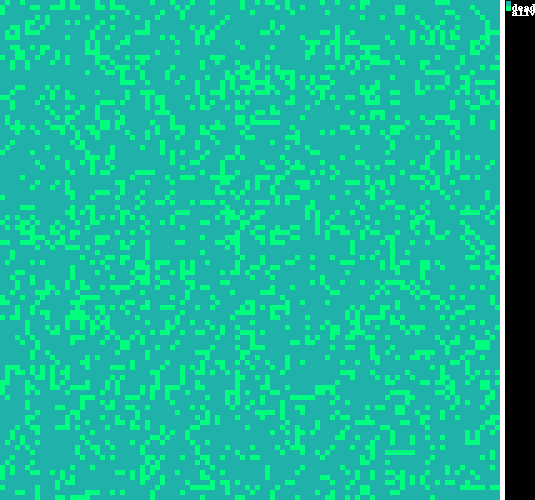

In [50]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
controller = Seeds()
runner = Runner(parallel=True)
result = runner.run(starting_state.state, controller, 60, structure=starting_state.structure, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
DiscreteSquareGridResultArtist(artist, result).to_gif("seeds.gif", wait=0.2, cell_size=6)

#### Diamoeba

100%|███████████████████████████████████████████████| 60/60 [00:03<00:00, 19.87it/s]


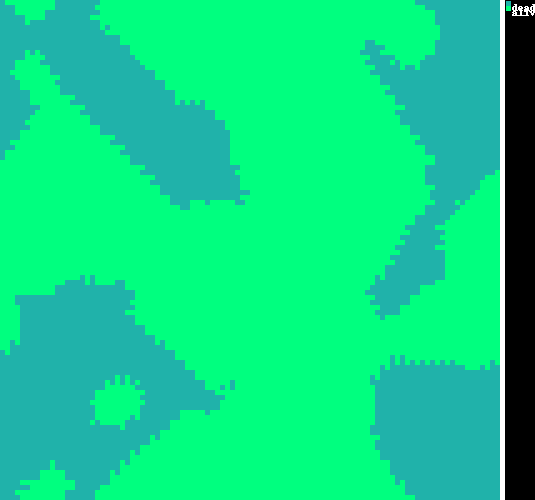

In [51]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
controller = Diamoeba()
runner = Runner(parallel=True)
result = runner.run(starting_state.state, controller, 60, structure=starting_state.structure, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
DiscreteSquareGridResultArtist(artist, result).to_gif("Diamoeba.gif", wait=0.2, cell_size=6)

### Anneal

100%|█████████████████████████████████████████████| 150/150 [00:07<00:00, 19.74it/s]


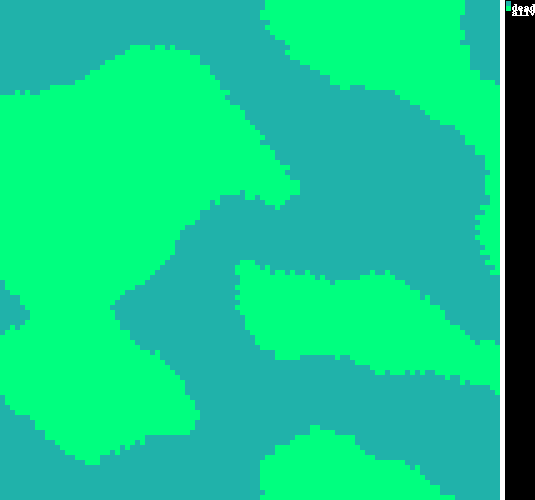

In [52]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
controller = Anneal()
runner = Runner(parallel=True)
result = runner.run(starting_state.state, controller, 150, structure=starting_state.structure, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
DiscreteSquareGridResultArtist(artist, result).to_gif("Anneal.gif", wait=0.2, cell_size=6)

### Maze

100%|█████████████████████████████████████████████| 150/150 [00:07<00:00, 19.05it/s]


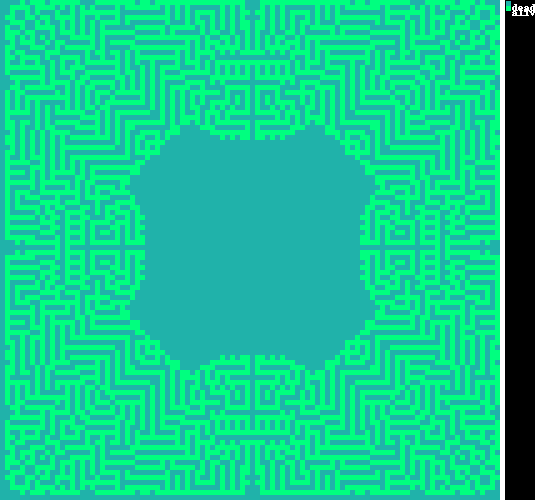

In [53]:
starting_state = setup.setup_particle(100, 30, "dead", "alive")
controller = Maze()
runner = Runner(parallel=True)
result = runner.run(starting_state.state, controller, 150, structure=starting_state.structure, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
DiscreteSquareGridResultArtist(artist, result).to_gif("Maze.gif", wait=0.2, cell_size=6)

### Other Lifes

You can specify any other life variant using the `Bxxx/Sxxx` syntax.

100%|█████████████████████████████████████████████| 150/150 [00:07<00:00, 20.10it/s]


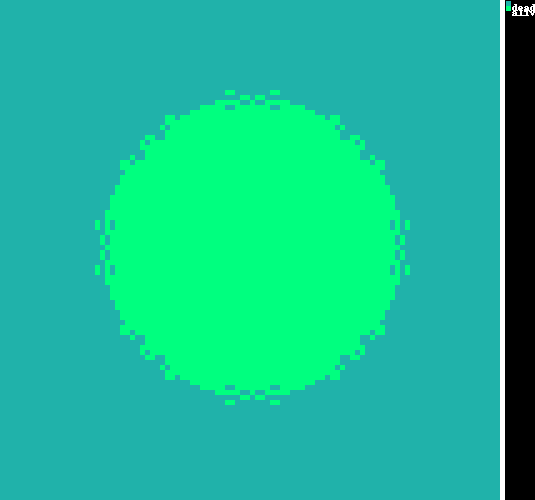

In [59]:
starting_state = setup.setup_particle(100, 30, "dead", "alive")
controller = GameOfLifeController(variant="B3678/S34678")
runner = Runner(parallel=True)
result = runner.run(starting_state.state, controller, 150, structure=starting_state.structure, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
DiscreteSquareGridResultArtist(artist, result).to_gif("daynnite.gif", wait=0.2, cell_size=6)

100%|█████████████████████████████████████████████| 150/150 [00:07<00:00, 20.32it/s]


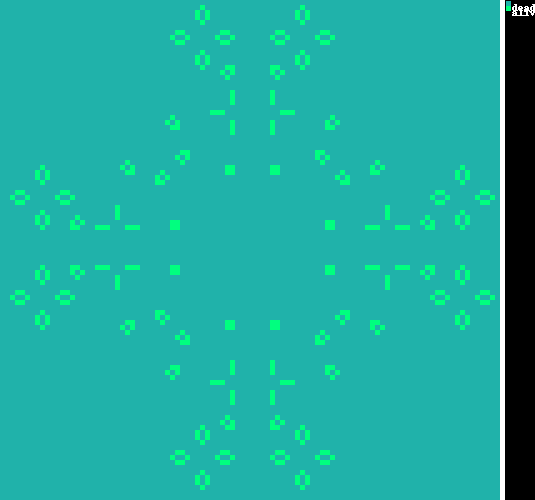

In [57]:
starting_state = setup.setup_particle(100, 30, "dead", "alive")
controller = GameOfLifeController(variant="B3/S238")
runner = Runner(parallel=True)
result = runner.run(starting_state.state, controller, 150, structure=starting_state.structure, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
DiscreteSquareGridResultArtist(artist, result).to_gif("8life.gif", wait=0.2, cell_size=6)